# teste simplificado

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import (
    levene,
    shapiro,
    ttest_ind,
    ttest_rel,
    f_oneway,
    wilcoxon,
    mannwhitneyu,
    friedmanchisquare,
    kruskal,
)


def analise_shapiro(dataframe, alfa=0.05):
    """docstring
    Realiza o Teste de Shapiro-Wilk para verificar normalidade de cada coluna numérica.

    Parâmetros
    ----------
    dataframe : pd.DataFrame
        Contém as colunas numéricas a serem testadas.
    alfa : float, opcional (default=0.05)
        Nível de significância para o teste.

    Exibe
    -----
    Resultado do teste com valor-p e interpretação para cada coluna.
    """
    print("Teste de Shapiro-Wilk")
    for coluna in dataframe.columns:
        estatistica_sw, valor_p_sw = shapiro(dataframe[coluna], nan_policy="omit")
        print(f"{estatistica_sw=:.3f}")
        if valor_p_sw > alfa:
            print(f"{coluna} segue uma distribuição normal (valor p: {valor_p_sw:.3f})")
        else:
            print(f"{coluna} não segue uma distribuição normal (valor p: {valor_p_sw:.3f})")

#----------------------------------------------------------------------------------------------------------------------------------------

def analise_levene(dataframe, alfa=0.05, centro="mean"):
    """docstring
    Realiza o Teste de Levene para verificar se os grupos têm variâncias iguais.

    Parâmetros
    ----------
    dataframe : pd.DataFrame
        Contém colunas numéricas dos grupos a serem comparados.
    alfa : float, opcional (default=0.05)
        Nível de significância.
    centro : {"mean", "median", "trimmed"}, opcional
        Tipo de centro a ser usado para o teste (padrão: média).

    Exibe
    -----
    Resultado do teste com valor-p e interpretação.
    """
    print("Teste de Levene")

    estatistica_levene, valor_p_levene = levene(
        *[dataframe[coluna] for coluna in dataframe.columns],
        center=centro,
        nan_policy="omit"
    )

    print(f"{estatistica_levene=:.3f}")
    if valor_p_levene > alfa:
        print(f"Variâncias iguais (valor p: {valor_p_levene:.3f})")
    else:
        print(f"Ao menos uma variância é diferente (valor p: {valor_p_levene:.3f})")

#----------------------------------------------------------------------------------------------------------------------------------------

def analises_shapiro_levene(dataframe, alfa=0.05, centro="mean"):
    """docstring
    Executa em sequência os testes de Shapiro-Wilk e Levene.

    Parâmetros
    ----------
    dataframe : pd.DataFrame
        Colunas numéricas a serem analisadas.
    alfa : float, opcional (default=0.05)
        Nível de significância.
    centro : str, opcional
        Tipo de centro para o teste de Levene.
    """
    print('Teste de Executar Ambos: Shapiro + Levene')
    analise_shapiro(dataframe, alfa)
    print()
    analise_levene(dataframe, alfa, centro)

#----------------------------------------------------------------------------------------------------------------------------------------
def analise_ttest_ind(
    dataframe,
    alfa=0.05,
    variancias_iguais=True,
    alternativa="two-sided",
):
    """
    Realiza o teste t independente (paramétrico) para comparar as médias de dois grupos independentes.

    O teste t independente é utilizado para verificar se há diferença estatisticamente significativa
    entre as médias de dois grupos independentes. Assume que os dados seguem uma distribuição normal
    e podem ter variâncias iguais ou diferentes (controlado pelo parâmetro `variancias_iguais`).

    Parâmetros:
    -----------
    dataframe : pd.DataFrame
        Um DataFrame contendo duas colunas, representando os dois grupos independentes.

    alfa : float, opcional (default=0.05)
        Nível de significância usado para avaliar a hipótese nula.

    variancias_iguais : bool, opcional (default=True)
        Indica se deve assumir que os grupos têm variâncias iguais (teste padrão de Student) ou não
        (usa-se o teste de Welch). Se False, aplica correção para variâncias desiguais.

    alternativa : str, opcional (default='two-sided')
        Define o tipo de hipótese alternativa:
        - 'two-sided': diferença nas médias em qualquer direção
        - 'less': a média do primeiro grupo é menor que a do segundo
        - 'greater': a média do primeiro grupo é maior que a do segundo

    Retorna:
    --------
    None
        O resultado do teste é exibido no console.

    Notas:
    ------
    - Este teste assume normalidade dos dados. Verifique com testes como Shapiro-Wilk antes de usá-lo.
    - A suposição de homogeneidade das variâncias pode ser verificada com o teste de Levene.
    """

    # Executa o teste t independente nas duas amostras fornecidas
    estatistica_ttest, valor_p_ttest = ttest_ind(
        *[dataframe[coluna] for coluna in dataframe.columns],
        equal_var=variancias_iguais,  # Define se as variâncias são consideradas iguais
        alternative=alternativa,      # Define o tipo de hipótese alternativa
        nan_policy="omit"             # Ignora valores ausentes nos cálculos
    )

    # Exibe o valor da estatística t calculada
    print('Teste t de Student(independente)')
    print(f"{estatistica_ttest=:.3f}")

    # Avalia o valor-p com base no nível de significância (alfa)
    if valor_p_ttest > alfa:
        print(f"Não rejeita a hipótese nula (valor p: {valor_p_ttest:.3f})")
    else:
        print(f"Rejeita a hipótese nula (valor p: {valor_p_ttest:.3f})")

#----------------------------------------------------------------------------------------------------------------------------------------

def analise_ttest_rel(
    dataframe,
    alfa=0.05,
    alternativa="two-sided",
):
    """docstring
    Teste T para comparar médias de dois grupos pareados (mesmos indivíduos).

    Parâmetros
    ----------
    dataframe : pd.DataFrame
        Deve conter duas colunas com os dois grupos relacionados.
    alfa : float, opcional
        Nível de significância.
    alternativa : {"two-sided", "less", "greater"}
        Tipo de hipótese alternativa.

    Exibe
    -----
    Estatística do teste, valor-p e conclusão do teste.
    """
    print('Teste T para Amostras Relacionadas (Pareadas)')
    estatistica_ttest, valor_p_ttest = ttest_rel(
        *[dataframe[coluna] for coluna in dataframe.columns],
        alternative=alternativa,
        nan_policy="omit"
    )

    print(f"Teste T para comparar médias de dois grupos pareados (mesmos indivíduos)")
    print(f"{estatistica_ttest=:.3f}")

    if valor_p_ttest > alfa:
        print(f"Não rejeita a hipótese nula (valor p: {valor_p_ttest:.3f})")
    else:
        print(f"Rejeita a hipótese nula (valor p: {valor_p_ttest:.3f})")

#----------------------------------------------------------------------------------------------------------------------------------------

def analise_anova_one_way(
    dataframe,
    alfa=0.05,
):
    """docstring
    Realiza o teste ANOVA one-way para comparar as médias de três ou mais grupos independentes.

    O teste ANOVA (Análise de Variância) one-way verifica se há diferença estatisticamente
    significativa entre as médias de três ou mais grupos independentes.

    Parâmetros:
    -----------
    dataframe : pd.DataFrame
        Um DataFrame onde cada coluna representa um grupo de dados numéricos.

    alfa : float, opcional (default=0.05)
        Nível de significância utilizado para decidir se a hipótese nula será rejeitada.
        Se o valor-p for menor que `alfa`, rejeita-se a hipótese nula.

    Retorna:
    --------
    None
        O resultado do teste é impresso diretamente no console.

    Notas:
    ------
    - Este teste assume que os dados em cada grupo são normalmente distribuídos e possuem variâncias semelhantes.
    - Para verificar essas suposições, podem ser realizados testes adicionais como Shapiro-Wilk (normalidade)
      e Levene (homocedasticidade).
    """

    print('Teste ANOVA one way')

    # Executa o teste ANOVA one-way
    estatistica_f, valor_p_f = f_oneway(
        *[dataframe[coluna] for coluna in dataframe.columns],
        nan_policy="omit"  # Ignora valores NaN nos cálculos
    )

    # Exibe o valor da estatística F calculada
    print(f"{estatistica_f=:.3f}")

    # Avalia o valor-p com base no nível de significância (alfa)
    if valor_p_f > alfa:
        print(f"Não rejeita a hipótese nula (valor p: {valor_p_f:.3f})")
    else:
        print(f"Rejeita a hipótese nula (valor p: {valor_p_f:.3f})")

#----------------------------------------------------------------------------------------------------------------------------------------

def analise_wilcoxon(
    dataframe,
    alfa=0.05,
    alternativa="two-sided",
):
    """
    Realiza o teste de Wilcoxon para amostras pareadas (teste não paramétrico).

    O teste de Wilcoxon é utilizado para comparar duas condições relacionadas,
    ou seja, amostras dependentes, quando os dados não seguem uma distribuição normal.
    É a versão não paramétrica do teste t pareado.

    Parâmetros:
    -----------
    dataframe : pd.DataFrame
        Um DataFrame com duas colunas, representando as amostras pareadas.

    alfa : float, opcional (default=0.05)
        Nível de significância usado para decidir se a hipótese nula será rejeitada.

    alternativa : str, opcional (default='two-sided')
        Define a hipótese alternativa. Pode ser:
        - 'two-sided': diferença entre os grupos em qualquer direção
        - 'less': o primeiro grupo tem valores menores que o segundo
        - 'greater': o primeiro grupo tem valores maiores que o segundo

    Retorna:
    --------
    None
        O resultado do teste é impresso no console.

    Notas:
    ------
    - Este teste é aplicado quando os mesmos indivíduos são medidos duas vezes (antes/depois),
      ou quando os pares são naturalmente relacionados.
    """

    print("Teste de Wilcoxon")

    # Executa o teste Wilcoxon nas duas colunas do dataframe
    estatistica_wilcoxon, valor_p_wilcoxon = wilcoxon(
        *[dataframe[coluna] for coluna in dataframe.columns],
        nan_policy="omit",  # Ignora valores NaN nos cálculos
        alternative=alternativa  # Define o tipo de hipótese alternativa
    )

    # Exibe o valor da estatística W calculada
    print(f"{estatistica_wilcoxon=:.3f}")

    # Avalia o valor-p com base no nível de significância (alfa)
    if valor_p_wilcoxon > alfa:
        print(f"Não rejeita a hipótese nula (valor p: {valor_p_wilcoxon:.3f})")
    else:
        print(f"Rejeita a hipótese nula (valor p: {valor_p_wilcoxon:.3f})")

#----------------------------------------------------------------------------------------------------------------------------------------

    print('Teste mannwhitneyu')

def analise_mannwhitneyu(
    dataframe,
    alfa=0.05,
    alternativa="two-sided",
):

    print("Teste de Mann-Whitney")
    estatistica_mw, valor_p_mw = mannwhitneyu(
        *[dataframe[coluna] for coluna in dataframe.columns],
        nan_policy="omit",
        alternative=alternativa,
    )

    print(f"{estatistica_mw=:.3f}")
    if valor_p_mw > alfa:
        print(f"Não rejeita a hipótese nula (valor p: {valor_p_mw:.3f})")
    else:
        print(f"Rejeita a hipótese nula (valor p: {valor_p_mw:.3f})")


#----------------------------------------------------------------------------------------------------------------------------------------

def analise_friedman(
    dataframe,
    alfa=0.05,
):
    """
    Realiza o teste de Friedman para amostras relacionadas (método não paramétrico).

    O teste de Friedman é utilizado para comparar três ou mais grupos de medidas
    relacionadas (amostras dependentes), sendo uma alternativa não paramétrica
    à ANOVA de medidas repetidas. Ele verifica se há diferenças estatísticas
    significativas entre os grupos.

    Parâmetros:
    -----------
    dataframe : pd.DataFrame
        Um DataFrame onde cada coluna representa um grupo/condição com dados pareados.

    alfa : float, opcional (default=0.05)
        Nível de significância usado para avaliar a hipótese nula.
        Se o valor-p for menor que `alfa`, rejeita-se a hipótese nula.

    Retorna:
    --------
    None
        O resultado do teste é impresso no console.

    Notas:
    ------
    - Este teste não assume normalidade dos dados.
    - Deve ser usado quando os mesmos indivíduos ou objetos são medidos sob diferentes condições.
    """

    print('Teste Friedman')

    # Executa o teste de Friedman nas colunas do dataframe
    estatistica_friedman, valor_p_friedman = friedmanchisquare(
        *[dataframe[coluna] for coluna in dataframe.columns],
        nan_policy="omit",  # Ignora valores NaN nos cálculos
    )

    # Exibe o valor da estatística qui-quadrado calculada
    print(f"{estatistica_friedman=:.3f}")

    # Avalia o valor-p com base no nível de significância (alfa)
    if valor_p_friedman > alfa:
        print(f"Não rejeita a hipótese nula (valor p: {valor_p_friedman:.3f})")
    else:
        print(f"Rejeita a hipótese nula (valor p: {valor_p_friedman:.3f})")

#----------------------------------------------------------------------------------------------------------------------------------------

def analise_kruskal(
    dataframe,
    alfa=0.05,
):
    """
    Realiza o teste de Kruskal-Wallis para comparação de três ou mais grupos independentes.

    O teste de Kruskal-Wallis é um método não paramétrico utilizado para avaliar se há
    diferença estatisticamente significativa entre as medianas de três ou mais grupos
    independentes. É uma alternativa à ANOVA one-way quando os dados não atendem aos
    pressupostos de normalidade.

    Parâmetros:
    -----------
    dataframe : pd.DataFrame
        Um DataFrame onde cada coluna representa um grupo independente.

    alfa : float, opcional (default=0.05)
        Nível de significância utilizado para decidir se a hipótese nula será rejeitada.
        Se o valor-p for menor que `alfa`, rejeita-se a hipótese nula.

    Retorna:
    --------
    None
        O resultado do teste é exibido no console.

    Notas:
    ------
    - Não pressupõe distribuição normal dos dados.
    - Os grupos devem ser independentes.
    - Para amostras relacionadas, utilize o teste de Friedman.
    """

    print('Teste kruskal')

    # Executa o teste Kruskal-Wallis nas colunas do dataframe
    estatistica_kruskal, valor_p_kruskal = kruskal(
        *[dataframe[coluna] for coluna in dataframe.columns],
        nan_policy="omit",  # Ignora valores NaN nos cálculos
    )

    # Exibe o valor da estatística qui-quadrado calculada
    print(f"{estatistica_kruskal=:.3f}")

    # Avalia o valor-p com base no nível de significância (alfa)
    if valor_p_kruskal > alfa:
        print(f"Não rejeita a hipótese nula (valor p: {valor_p_kruskal:.3f})")
    else:
        print(f"Rejeita a hipótese nula (valor p: {valor_p_kruskal:.3f})")

#----------------------------------------------------------------------------------------------------------------------------------------

# 1. Projeto diabetes - 01 - Conhecendo a base

O diabetes é uma doença crônica grave na qual os indivíduos perdem a capacidade de regular efetivamente os níveis de glicose no sangue e pode levar a uma redução na qualidade de vida e na expectativa de vida.

O Sistema de Vigilância de Fatores de Risco Comportamentais (BRFSS) é uma pesquisa telefônica relacionada à saúde que é coletada anualmente pelo CDC (Centro de Controle e Prevenção de Doenças dos Estados Unidos). A cada ano, a pesquisa coleta respostas de milhares de americanos sobre comportamentos de risco relacionados à saúde, condições crônicas de saúde e o uso de serviços preventivos. Para este projeto, foi utilizado conjunto de dados disponível no Kaggle para o ano de 2015.

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

Dicionário de variáveis:

- `Diabetes_binary`: 0 = sem diabetes, 1 = com diabetes
- `HighBP`: 0 = sem pressão alta, 1 = com pressão alta
- `HighChol`: 0 = sem colesterol alto, 1 = com colesterol alto
- `CholCheck`: 0 = não fez exame de colesterol na vida, 1 = fez exame de colesterol alguma vez
- `BMI`: Índice de Massa Corporal (IMC)
- `Smoker`: 0 = não fumante, 1 = fumante
- `Stroke`: 0 = sem histórico de AVC, 1 = com histórico de AVC
- `HeartDiseaseorAttack`: 0 = sem histórico de doença cardíaca ou ataque cardíaco, 1 = com histórico de doença cardíaca ou ataque cardíaco
- `PhysActivity`: 0 = não pratica atividade física, 1 = pratica atividade física
- `Fruits`: 0 = não consome frutas, 1 = consome frutas
- `Veggies`: 0 = não consome vegetais, 1 = consome vegetais
- `HvyAlcoholConsump`: 0 = não consome álcool em altas quantidades, 1 = consome álcool em altas quantidades
- `AnyHealthcare`: 0 = não tem plano de saúde, 1 = tem plano de saúde
- `NoDocbcCost`: 0 = não foi ao médico por questões financeiras, 1 = foi ao médico por questões financeiras (últimos 12 meses)
- `GenHlth`: Saúde geral (1 a 5) - 1 = Excelente, 2 = Muito boa, 3 = Boa, 4 = Aceitável, 5 = Ruim
- `MentHlth`: Nos últimos 30 dias, quantos dias a saúde mental não foi boa (0 a 30)
- `PhysHlth`: Nos últimos 30 dias, quantos dias a saúde física não foi boa (0 a 30)
- `DiffWalk`: 0 = não tem dificuldade para caminhar, 1 = tem dificuldade para caminhar
- `Sex`: 0 = feminino, 1 = masculino
- `Age`: Idade em faixas 1 = 18-24; 2 = 25-29; 3 = 30-34; 4 = 35-39; 5 = 40-44; 6 = 45-49; 7 = 50-54; 8 = 55-59; 9 = 60-64; 10 = 65-69; 11 = 70-74; 12 = 75-79; 13 = 80+
- `Education`: Níveis de ensino 1 = nunca frequentou a escola; 2 = escola primária; 3 = escola secundária incompleta ; 4 = escola secundária; 5 = faculdade incompleta ou curso técnico; 6 = completou faculdade ou diplomas superiores
- `Income`: Renda anual em faixas 1 = < 10.000; 2 = 10.000-14.999; 3 = 15.000-19.999; 4 = 20.000-24.999; 5 = 25.000-34.999; 6 = 35.000-49.999; 7 = 50.000-74.999; 8 = 75.000+

In [7]:
import pandas as pd

from src.config import DADOS_ORIGINAIS

df_diabetes = pd.read_csv(DADOS_ORIGINAIS, compression='zip')

df_diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [8]:
with pd.option_context("display.max_columns", None):
    display(df_diabetes.head())

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [9]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [10]:
df_diabetes.columns = [
    "Diabetes",
    "PressaoAlta",
    "ColesterolAlto",
    "ColesterolExame",
    "IMC",
    "Fumante",
    "AVC",
    "ProblemaCardiaco",
    "AtividadeFisica",
    "ComeFrutas",
    "ComeLegumes",
    "ConsumoBebidaAlcoolica",
    "PlanoSaude",
    "SemDinheiroConsultas",
    "SaudeGeral",
    "DiasProblemasMentais",
    "DiasProblemasFisicos",
    "DificuldadeAndar",
    "Genero",
    "FaixaIdade",
    "Ensino",
    "FaixaRenda",
]

In [11]:
df_diabetes.nunique()

Diabetes                   2
PressaoAlta                2
ColesterolAlto             2
ColesterolExame            2
IMC                       80
Fumante                    2
AVC                        2
ProblemaCardiaco           2
AtividadeFisica            2
ComeFrutas                 2
ComeLegumes                2
ConsumoBebidaAlcoolica     2
PlanoSaude                 2
SemDinheiroConsultas       2
SaudeGeral                 5
DiasProblemasMentais      31
DiasProblemasFisicos      31
DificuldadeAndar           2
Genero                     2
FaixaIdade                13
Ensino                     6
FaixaRenda                 8
dtype: int64

In [12]:
colunas_binarias = df_diabetes.nunique()[df_diabetes.nunique() == 2].index.tolist()

colunas_binarias

['Diabetes',
 'PressaoAlta',
 'ColesterolAlto',
 'ColesterolExame',
 'Fumante',
 'AVC',
 'ProblemaCardiaco',
 'AtividadeFisica',
 'ComeFrutas',
 'ComeLegumes',
 'ConsumoBebidaAlcoolica',
 'PlanoSaude',
 'SemDinheiroConsultas',
 'DificuldadeAndar',
 'Genero']

In [13]:
with pd.option_context("display.max_columns", None):
    display(df_diabetes.head())

,Diabetes,PressaoAlta,ColesterolAlto,ColesterolExame,IMC,Fumante,AVC,ProblemaCardiaco,AtividadeFisica,ComeFrutas,ComeLegumes,ConsumoBebidaAlcoolica,PlanoSaude,SemDinheiroConsultas,SaudeGeral,DiasProblemasMentais,DiasProblemasFisicos,DificuldadeAndar,Genero,FaixaIdade,Ensino,FaixaRenda
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


### otimizações de dataframes: https://www.youtube.com/watch?v=0IoOuHeYERg

In [15]:
df_diabetes_tratado = df_diabetes.copy()

for coluna in colunas_binarias:
  if coluna != "Genero":
    df_diabetes_tratado[coluna] = pd.Categorical(df_diabetes_tratado[coluna]).rename_categories(["Não", "Sim"])
  else:
    df_diabetes_tratado[coluna] = pd.Categorical(df_diabetes_tratado[coluna]).rename_categories(["Feminino", "Masculino"])


df_diabetes_tratado.head()

,Diabetes,PressaoAlta,ColesterolAlto,ColesterolExame,IMC,Fumante,AVC,ProblemaCardiaco,AtividadeFisica,ComeFrutas,...,PlanoSaude,SemDinheiroConsultas,SaudeGeral,DiasProblemasMentais,DiasProblemasFisicos,DificuldadeAndar,Genero,FaixaIdade,Ensino,FaixaRenda
0,Não,Sim,Não,Sim,26.0,Não,Não,Não,Sim,Não,...,Sim,Não,3.0,5.0,30.0,Não,Masculino,4.0,6.0,8.0
1,Não,Sim,Sim,Sim,26.0,Sim,Sim,Não,Não,Sim,...,Sim,Não,3.0,0.0,0.0,Não,Masculino,12.0,6.0,8.0
2,Não,Não,Não,Sim,26.0,Não,Não,Não,Sim,Sim,...,Sim,Não,1.0,0.0,10.0,Não,Masculino,13.0,6.0,8.0
3,Não,Sim,Sim,Sim,28.0,Sim,Não,Não,Sim,Sim,...,Sim,Não,3.0,0.0,3.0,Não,Masculino,11.0,6.0,8.0
4,Não,Não,Não,Sim,29.0,Sim,Não,Não,Sim,Sim,...,Sim,Não,2.0,0.0,0.0,Não,Feminino,8.0,5.0,8.0


In [16]:
df_diabetes_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Diabetes                70692 non-null  category
 1   PressaoAlta             70692 non-null  category
 2   ColesterolAlto          70692 non-null  category
 3   ColesterolExame         70692 non-null  category
 4   IMC                     70692 non-null  float64 
 5   Fumante                 70692 non-null  category
 6   AVC                     70692 non-null  category
 7   ProblemaCardiaco        70692 non-null  category
 8   AtividadeFisica         70692 non-null  category
 9   ComeFrutas              70692 non-null  category
 10  ComeLegumes             70692 non-null  category
 11  ConsumoBebidaAlcoolica  70692 non-null  category
 12  PlanoSaude              70692 non-null  category
 13  SemDinheiroConsultas    70692 non-null  category
 14  SaudeGeral            

In [17]:
df_diabetes_tratado['SaudeGeral'] = pd.Categorical(
    df_diabetes_tratado['SaudeGeral'],
    ordered=True
    ).rename_categories(["Excelente", "Muito Boa", "Boa", "Aceitável", "Ruim"])

df_diabetes_tratado['SaudeGeral'].head()

0          Boa
1          Boa
2    Excelente
3          Boa
4    Muito Boa
Name: SaudeGeral, dtype: category
Categories (5, object): ['Excelente' < 'Muito Boa' < 'Boa' < 'Aceitável' < 'Ruim']

In [18]:
df_diabetes_tratado["FaixaIdade"] = pd.Categorical(
    df_diabetes_tratado["FaixaIdade"],
    ordered=True
    ).rename_categories([
        "18-24",
        "25-29",
        "30-34",
        "35-39",
        "40-44",
        "45-49",
        "50-54",
        "55-59",
        "60-64",
        "65-69",
        "70-74",
        "75-79",
        "80+"
    ])

df_diabetes_tratado["FaixaIdade"].head()

0    35-39
1    75-79
2      80+
3    70-74
4    55-59
Name: FaixaIdade, dtype: category
Categories (13, object): ['18-24' < '25-29' < '30-34' < '35-39' ... '65-69' < '70-74' < '75-79' < '80+']

In [19]:
df_diabetes_tratado["Ensino"] = pd.Categorical(
    df_diabetes_tratado["Ensino"],
    ordered=True
    ).rename_categories([
        'Sem estudo',
        'Primário',
        "Secundário inc.",
        "Secundário",
        "Faculdade inc ou Técnico",
        "Faculdade +",
    ])

df_diabetes_tratado["Ensino"].head()

0                 Faculdade +
1                 Faculdade +
2                 Faculdade +
3                 Faculdade +
4    Faculdade inc ou Técnico
Name: Ensino, dtype: category
Categories (6, object): ['Sem estudo' < 'Primário' < 'Secundário inc.' < 'Secundário' < 'Faculdade inc ou Técnico' < 'Faculdade +']

In [20]:
df_diabetes_tratado["FaixaRenda"] = pd.Categorical(
    df_diabetes_tratado["FaixaRenda"],
    ordered=True
    ).rename_categories([
        "< $10.000",
        "$10.000-$14.999",
        "$15.000-$19.999",
        "$20.000-$24.999",
        "$25.000-$34.999",
        "$35.000-$49.999",
        "$50.000-$74.999",
        "$75.000+",
    ])

df_diabetes_tratado["FaixaRenda"].head()

0    $75.000+
1    $75.000+
2    $75.000+
3    $75.000+
4    $75.000+
Name: FaixaRenda, dtype: category
Categories (8, object): ['< $10.000' < '$10.000-$14.999' < '$15.000-$19.999' < '$20.000-$24.999' < '$25.000-$34.999' < '$35.000-$49.999' < '$50.000-$74.999' < '$75.000+']

In [21]:
df_diabetes_tratado.head()

,Diabetes,PressaoAlta,ColesterolAlto,ColesterolExame,IMC,Fumante,AVC,ProblemaCardiaco,AtividadeFisica,ComeFrutas,...,PlanoSaude,SemDinheiroConsultas,SaudeGeral,DiasProblemasMentais,DiasProblemasFisicos,DificuldadeAndar,Genero,FaixaIdade,Ensino,FaixaRenda
0,Não,Sim,Não,Sim,26.0,Não,Não,Não,Sim,Não,...,Sim,Não,Boa,5.0,30.0,Não,Masculino,35-39,Faculdade +,$75.000+
1,Não,Sim,Sim,Sim,26.0,Sim,Sim,Não,Não,Sim,...,Sim,Não,Boa,0.0,0.0,Não,Masculino,75-79,Faculdade +,$75.000+
2,Não,Não,Não,Sim,26.0,Não,Não,Não,Sim,Sim,...,Sim,Não,Excelente,0.0,10.0,Não,Masculino,80+,Faculdade +,$75.000+
3,Não,Sim,Sim,Sim,28.0,Sim,Não,Não,Sim,Sim,...,Sim,Não,Boa,0.0,3.0,Não,Masculino,70-74,Faculdade +,$75.000+
4,Não,Não,Não,Sim,29.0,Sim,Não,Não,Sim,Sim,...,Sim,Não,Muito Boa,0.0,0.0,Não,Feminino,55-59,Faculdade inc ou Técnico,$75.000+


In [22]:
df_diabetes_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Diabetes                70692 non-null  category
 1   PressaoAlta             70692 non-null  category
 2   ColesterolAlto          70692 non-null  category
 3   ColesterolExame         70692 non-null  category
 4   IMC                     70692 non-null  float64 
 5   Fumante                 70692 non-null  category
 6   AVC                     70692 non-null  category
 7   ProblemaCardiaco        70692 non-null  category
 8   AtividadeFisica         70692 non-null  category
 9   ComeFrutas              70692 non-null  category
 10  ComeLegumes             70692 non-null  category
 11  ConsumoBebidaAlcoolica  70692 non-null  category
 12  PlanoSaude              70692 non-null  category
 13  SemDinheiroConsultas    70692 non-null  category
 14  SaudeGeral            

In [23]:
df_diabetes_tratado.describe()

,IMC,DiasProblemasMentais,DiasProblemasFisicos
count,70692.000000,70692.000000,70692.000000
mean,29.856985,3.752037,5.810417
std,7.113954,8.155627,10.062261
min,12.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,29.000000,0.000000,0.000000
75%,33.000000,2.000000,6.000000
max,98.000000,30.000000,30.000000


analisando que numero estão como float, mas todos são praticamente int

In [25]:
(1.2).is_integer() # essa analise se possivel converter float para int

False

In [26]:
(1.0).is_integer() # essa analise se possivel converter float para int

True

In [27]:
df_diabetes_tratado['IMC'].apply(float.is_integer)

0        True
1        True
2        True
3        True
4        True
         ... 
70687    True
70688    True
70689    True
70690    True
70691    True
Name: IMC, Length: 70692, dtype: bool

In [28]:
df_diabetes_tratado['IMC'].apply(float.is_integer).all()

True

In [29]:
colunas_numericas = df_diabetes_tratado.select_dtypes(include='number').columns.tolist()

colunas_numericas

['IMC', 'DiasProblemasMentais', 'DiasProblemasFisicos']

In [30]:
df_diabetes_tratado.describe()

,IMC,DiasProblemasMentais,DiasProblemasFisicos
count,70692.000000,70692.000000,70692.000000
mean,29.856985,3.752037,5.810417
std,7.113954,8.155627,10.062261
min,12.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,29.000000,0.000000,0.000000
75%,33.000000,2.000000,6.000000
max,98.000000,30.000000,30.000000


In [31]:
df_diabetes_tratado.describe(exclude='number')

,Diabetes,PressaoAlta,ColesterolAlto,ColesterolExame,Fumante,AVC,ProblemaCardiaco,AtividadeFisica,ComeFrutas,ComeLegumes,ConsumoBebidaAlcoolica,PlanoSaude,SemDinheiroConsultas,SaudeGeral,DificuldadeAndar,Genero,FaixaIdade,Ensino,FaixaRenda
count,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692,70692
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,5,2,2,13,6,8
top,Não,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Sim,Não,Boa,Não,Feminino,65-69,Faculdade +,$75.000+
freq,35346,39832,37163,68943,37094,66297,60243,49699,43249,55760,67672,67508,64053,23427,52826,38386,10856,26020,20646


### formatos para salvar: https://www.youtube.com/watch?v=pTwDOKfB9QA

## dados tratado


In [34]:
from src.config import DADOS_TRATADOS

df_diabetes_parquet = pd.read_parquet(DADOS_TRATADOS)

df_diabetes_parquet.head()

,Diabetes,PressaoAlta,ColesterolAlto,ColesterolExame,IMC,Fumante,AVC,ProblemaCardiaco,AtividadeFisica,ComeFrutas,...,PlanoSaude,SemDinheiroConsultas,SaudeGeral,DiasProblemasMentais,DiasProblemasFisicos,DificuldadeAndar,Genero,FaixaIdade,Ensino,FaixaRenda
0,Não,Sim,Não,Sim,26,Não,Não,Não,Sim,Não,...,Sim,Não,Boa,5,30,Não,Masculino,35-39,Faculdade +,$75.000+
1,Não,Sim,Sim,Sim,26,Sim,Sim,Não,Não,Sim,...,Sim,Não,Boa,0,0,Não,Masculino,75-79,Faculdade +,$75.000+
2,Não,Não,Não,Sim,26,Não,Não,Não,Sim,Sim,...,Sim,Não,Excelente,0,10,Não,Masculino,80+,Faculdade +,$75.000+
3,Não,Sim,Sim,Sim,28,Sim,Não,Não,Sim,Sim,...,Sim,Não,Boa,0,3,Não,Masculino,70-74,Faculdade +,$75.000+
4,Não,Não,Não,Sim,29,Sim,Não,Não,Sim,Sim,...,Sim,Não,Muito Boa,0,0,Não,Feminino,55-59,Faculdade inc ou Técnico,$75.000+


In [35]:
df_diabetes_parquet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Diabetes                70692 non-null  category
 1   PressaoAlta             70692 non-null  category
 2   ColesterolAlto          70692 non-null  category
 3   ColesterolExame         70692 non-null  category
 4   IMC                     70692 non-null  int8    
 5   Fumante                 70692 non-null  category
 6   AVC                     70692 non-null  category
 7   ProblemaCardiaco        70692 non-null  category
 8   AtividadeFisica         70692 non-null  category
 9   ComeFrutas              70692 non-null  category
 10  ComeLegumes             70692 non-null  category
 11  ConsumoBebidaAlcoolica  70692 non-null  category
 12  PlanoSaude              70692 non-null  category
 13  SemDinheiroConsultas    70692 non-null  category
 14  SaudeGeral            

# Análise exploratória dos dados (EDA)

O diabetes é uma doença crônica grave na qual os indivíduos perdem a capacidade de regular efetivamente os níveis de glicose no sangue e pode levar a uma redução na qualidade de vida e na expectativa de vida.

O Sistema de Vigilância de Fatores de Risco Comportamentais (BRFSS) é uma pesquisa telefônica relacionada à saúde que é coletada anualmente pelo CDC (Centro de Controle e Prevenção de Doenças dos Estados Unidos). A cada ano, a pesquisa coleta respostas de milhares de americanos sobre comportamentos de risco relacionados à saúde, condições crônicas de saúde e o uso de serviços preventivos. Para este projeto, foi utilizado conjunto de dados disponível no Kaggle para o ano de 2015.

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

Dicionário de variáveis:

- `Diabetes_binary`: 0 = sem diabetes, 1 = com diabetes
- `HighBP`: 0 = sem pressão alta, 1 = com pressão alta
- `HighChol`: 0 = sem colesterol alto, 1 = com colesterol alto
- `CholCheck`: 0 = não fez exame de colesterol na vida, 1 = fez exame de colesterol alguma vez
- `BMI`: Índice de Massa Corporal (IMC)
- `Smoker`: 0 = não fumante, 1 = fumante
- `Stroke`: 0 = sem histórico de AVC, 1 = com histórico de AVC
- `HeartDiseaseorAttack`: 0 = sem histórico de doença cardíaca ou ataque cardíaco, 1 = com histórico de doença cardíaca ou ataque cardíaco
- `PhysActivity`: 0 = não pratica atividade física, 1 = pratica atividade física
- `Fruits`: 0 = não consome frutas, 1 = consome frutas
- `Veggies`: 0 = não consome vegetais, 1 = consome vegetais
- `HvyAlcoholConsump`: 0 = não consome álcool em altas quantidades, 1 = consome álcool em altas quantidades
- `AnyHealthcare`: 0 = não tem plano de saúde, 1 = tem plano de saúde
- `NoDocbcCost`: 0 = não foi ao médico por questões financeiras, 1 = foi ao médico por questões financeiras (últimos 12 meses)
- `GenHlth`: Saúde geral (1 a 5) - 1 = Excelente, 2 = Muito boa, 3 = Boa, 4 = Aceitável, 5 = Ruim
- `MentHlth`: Nos últimos 30 dias, quantos dias a saúde mental não foi boa (0 a 30)
- `PhysHlth`: Nos últimos 30 dias, quantos dias a saúde física não foi boa (0 a 30)
- `DiffWalk`: 0 = não tem dificuldade para caminhar, 1 = tem dificuldade para caminhar
- `Sex`: 0 = feminino, 1 = masculino
- `Age`: Idade em faixas 1 = 18-24; 2 = 25-29; 3 = 30-34; 4 = 35-39; 5 = 40-44; 6 = 45-49; 7 = 50-54; 8 = 55-59; 9 = 60-64; 10 = 65-69; 11 = 70-74; 12 = 75-79; 13 = 80+
- `Education`: Níveis de ensino 1 = nunca frequentou a escola; 2 = escola primária; 3 = escola secundária incompleta ; 4 = escola secundária; 5 = faculdade incompleta ou curso técnico; 6 = completou faculdade ou diplomas superiores
- `Income`: Renda anual (dólares) em faixas 1 = < 10.000; 2 = 10.000-14.999; 3 = 15.000-19.999; 4 = 20.000-24.999; 5 = 25.000-34.999; 6 = 35.000-49.999; 7 = 50.000-74.999; 8 = 75.000+

In [39]:
import pandas as pd

from src.config import DADOS_TRATADOS

df_diabetes_tratado = pd.read_parquet(DADOS_TRATADOS)

df_diabetes_tratado.head()

,Diabetes,PressaoAlta,ColesterolAlto,ColesterolExame,IMC,Fumante,AVC,ProblemaCardiaco,AtividadeFisica,ComeFrutas,...,PlanoSaude,SemDinheiroConsultas,SaudeGeral,DiasProblemasMentais,DiasProblemasFisicos,DificuldadeAndar,Genero,FaixaIdade,Ensino,FaixaRenda
0,Não,Sim,Não,Sim,26,Não,Não,Não,Sim,Não,...,Sim,Não,Boa,5,30,Não,Masculino,35-39,Faculdade +,$75.000+
1,Não,Sim,Sim,Sim,26,Sim,Sim,Não,Não,Sim,...,Sim,Não,Boa,0,0,Não,Masculino,75-79,Faculdade +,$75.000+
2,Não,Não,Não,Sim,26,Não,Não,Não,Sim,Sim,...,Sim,Não,Excelente,0,10,Não,Masculino,80+,Faculdade +,$75.000+
3,Não,Sim,Sim,Sim,28,Sim,Não,Não,Sim,Sim,...,Sim,Não,Boa,0,3,Não,Masculino,70-74,Faculdade +,$75.000+
4,Não,Não,Não,Sim,29,Sim,Não,Não,Sim,Sim,...,Sim,Não,Muito Boa,0,0,Não,Feminino,55-59,Faculdade inc ou Técnico,$75.000+


In [40]:
colunas_numericas = df_diabetes_tratado.select_dtypes(include="number").columns.tolist()

coluna_alvo = "Diabetes"

colunas_categoricas = df_diabetes_tratado.select_dtypes(include="category").columns.tolist()
colunas_categoricas.remove(coluna_alvo)

colunas_binarias = df_diabetes_tratado.nunique()[df_diabetes_tratado.nunique() == 2].index.tolist()
colunas_binarias.remove(coluna_alvo)

colunas_nao_binarias = list(set(colunas_categoricas) - set(colunas_binarias))

In [41]:
colunas_numericas

['IMC', 'DiasProblemasMentais', 'DiasProblemasFisicos']

In [42]:
coluna_alvo

'Diabetes'

In [43]:
colunas_categoricas

['PressaoAlta',
 'ColesterolAlto',
 'ColesterolExame',
 'Fumante',
 'AVC',
 'ProblemaCardiaco',
 'AtividadeFisica',
 'ComeFrutas',
 'ComeLegumes',
 'ConsumoBebidaAlcoolica',
 'PlanoSaude',
 'SemDinheiroConsultas',
 'SaudeGeral',
 'DificuldadeAndar',
 'Genero',
 'FaixaIdade',
 'Ensino',
 'FaixaRenda']

In [44]:
colunas_binarias

['PressaoAlta',
 'ColesterolAlto',
 'ColesterolExame',
 'Fumante',
 'AVC',
 'ProblemaCardiaco',
 'AtividadeFisica',
 'ComeFrutas',
 'ComeLegumes',
 'ConsumoBebidaAlcoolica',
 'PlanoSaude',
 'SemDinheiroConsultas',
 'DificuldadeAndar',
 'Genero']

In [45]:
colunas_nao_binarias

['FaixaRenda', 'SaudeGeral', 'FaixaIdade', 'Ensino']

## Variáveis numéricas

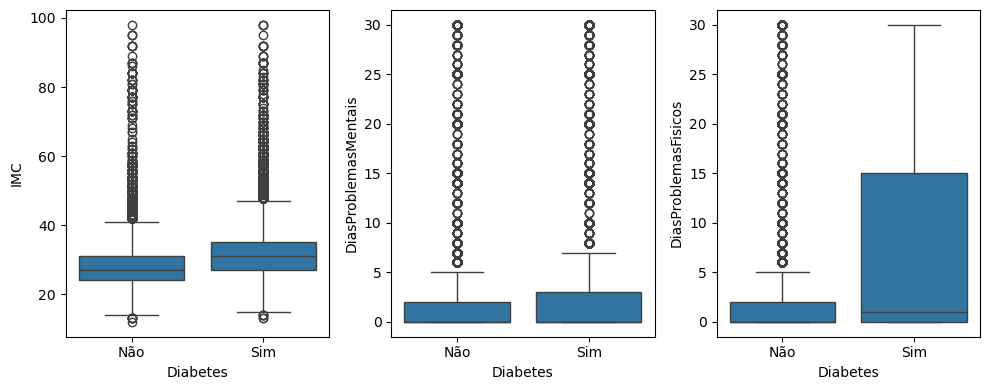

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(10, 4))

for ax, coluna in zip(axs, colunas_numericas):
  sns.boxplot(data=df_diabetes_tratado, x=coluna_alvo, y=coluna, ax=ax)

plt.tight_layout()
plt.show()

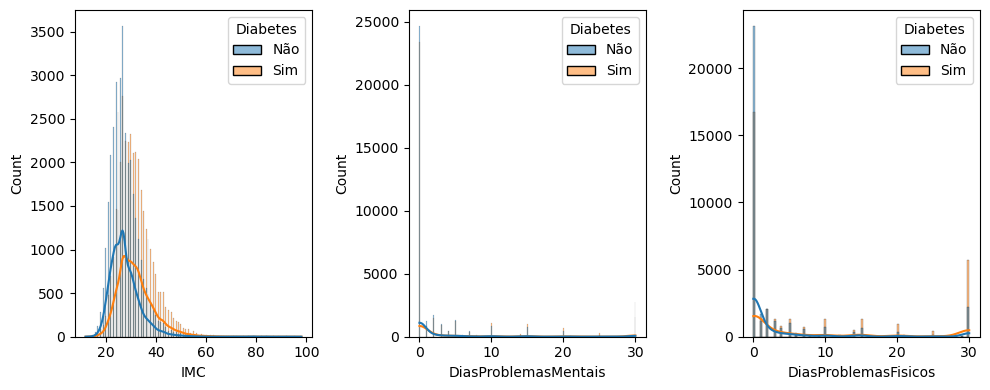

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

for ax, coluna in zip(axs, colunas_numericas):
  sns.histplot(data=df_diabetes_tratado, x=coluna, hue=coluna_alvo, kde=True, ax=ax)

plt.tight_layout()
plt.show()

- atenção para os dados de IMC terem sido arredondados para inteiros
- será que considerar que há diferença entre diabéticos e não diabéticos considerando IMC?

In [50]:
df_diabetes_tratado.groupby(coluna_alvo, observed=False).describe().T

Diabetes                             Não           Sim
IMC                  count  35346.000000  35346.000000
                     mean      27.769960     31.944011
                     std        6.187636      7.363401
                     min       12.000000     13.000000
                     25%       24.000000     27.000000
                     50%       27.000000     31.000000
                     75%       31.000000     35.000000
                     max       98.000000     98.000000
DiasProblemasMentais count  35346.000000  35346.000000
                     mean       3.042268      4.461806
                     std        7.208408      8.947717
                     min        0.000000      0.000000
                     25%        0.000000      0.000000
                     50%        0.000000      0.000000
                     75%        2.000000      3.000000
                     max       30.000000     30.000000
DiasProblemasFisicos count  35346.000000  35346.000000
                     mean       3.666355      7.954479
                     std        8.098339     11.301491
                     min        0.000000      0.000000
                     25%        0.000000      0.000000
                     50%        0.000000      1.000000
                     75%        2.000000     15.000000
                     max       30.000000     30.000000

In [51]:
df_diabetes_tratado.corr(numeric_only=True)

,IMC,DiasProblemasMentais,DiasProblemasFisicos
IMC,1.000000,0.104682,0.161862
DiasProblemasMentais,0.104682,1.000000,0.380272
DiasProblemasFisicos,0.161862,0.380272,1.000000


- teste t de Student para comparar médias de IMC entre diabéticos e não diabéticos?
- ou teste de Mann-Whitney U para comparar medianas de IMC entre diabéticos e não diabéticos?

### Faz sentido testar a normalidade das variáveis numéricas?

Links e artigos sobre testes de hipótese em datasets grandes:

- https://stats.stackexchange.com/questions/2492/is-normality-testing-essentially-useless
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/pdf/ijem-10-486.pdf
- https://www.bmj.com/content/bmj/310/6975/298.full.pdf
- https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/1471-2288-12-81

In [55]:
df_diabetes_tratado.groupby(coluna_alvo, observed=False).skew(numeric_only=True)

,IMC,DiasProblemasMentais,DiasProblemasFisicos
Diabetes,,,
Não,2.231015,2.808070,2.480202
Sim,1.527018,2.065169,1.150047


In [56]:
df_diabetes_tratado.groupby(coluna_alvo, observed=False)[colunas_numericas].apply(pd.DataFrame.kurtosis)

,IMC,DiasProblemasMentais,DiasProblemasFisicos
Diabetes,,,
Não,12.901012,7.012218,4.910598
Sim,5.717382,2.873176,-0.341922


In [57]:
dados_imc_sim = df_diabetes_tratado.query(f"{coluna_alvo} == 'Sim'")['IMC'].values
dados_imc_nao = df_diabetes_tratado.query(f"{coluna_alvo} == 'Não'")['IMC'].values

In [58]:
from scipy.stats import kstest, norm

print(kstest(dados_imc_nao, norm.cdf, args=(dados_imc_nao.mean(), dados_imc_nao.std())))
print(kstest(dados_imc_sim, norm.cdf, args=(dados_imc_sim.mean(), dados_imc_sim.std())))

KstestResult(statistic=0.1209153634702329, pvalue=0.0, statistic_location=28, statistic_sign=1)
KstestResult(statistic=0.10452803408478695, pvalue=0.0, statistic_location=33, statistic_sign=1)


In [59]:
dataframe_imc = pd.DataFrame({
    "Não": dados_imc_nao,
    "Sim": dados_imc_sim,
})

dataframe_imc

,Não,Sim
0,26,30
1,26,25
2,26,28
3,28,23
4,29,27
...,...,...
35341,23,37
35342,29,29
35343,24,25
35344,53,18


In [60]:
analise_levene(dataframe_imc, centro='median')

Teste de Levene
estatistica_levene=888.297
Ao menos uma variância é diferente (valor p: 0.000)


In [61]:
analise_ttest_ind(dataframe_imc, variancias_iguais=False)

Teste t de Student(independente)
estatistica_ttest=-81.591
Rejeita a hipótese nula (valor p: 0.000)


In [62]:
analise_mannwhitneyu(dataframe_imc)

Teste de Mann-Whitney
estatistica_mw=388166232.000
Rejeita a hipótese nula (valor p: 0.000)


### Os outliers interferem?

In [64]:
def remove_outliers(dados, largura_bigodes=1.5):
    q1 = dados.quantile(0.25)
    q3 = dados.quantile(0.75)
    iqr = q3 - q1
    return dados[(dados >= q1 - largura_bigodes * iqr) & (dados <= q3 + largura_bigodes * iqr)]

In [65]:
df_diabetes_sem_outliers = df_diabetes_tratado.copy()

for coluna in colunas_numericas:
    df_diabetes_sem_outliers[coluna] = remove_outliers(df_diabetes_sem_outliers[coluna])

df_diabetes_sem_outliers.describe()

,IMC,DiasProblemasMentais,DiasProblemasFisicos
count,68511.000000,58876.000000,60068.000000
mean,29.129673,0.526615,1.880619
std,5.695466,1.271375,3.727202
min,13.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000
75%,33.000000,0.000000,2.000000
max,45.000000,5.000000,15.000000


In [66]:
df_diabetes_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Diabetes                70692 non-null  category
 1   PressaoAlta             70692 non-null  category
 2   ColesterolAlto          70692 non-null  category
 3   ColesterolExame         70692 non-null  category
 4   IMC                     68511 non-null  float64 
 5   Fumante                 70692 non-null  category
 6   AVC                     70692 non-null  category
 7   ProblemaCardiaco        70692 non-null  category
 8   AtividadeFisica         70692 non-null  category
 9   ComeFrutas              70692 non-null  category
 10  ComeLegumes             70692 non-null  category
 11  ConsumoBebidaAlcoolica  70692 non-null  category
 12  PlanoSaude              70692 non-null  category
 13  SemDinheiroConsultas    70692 non-null  category
 14  SaudeGeral            

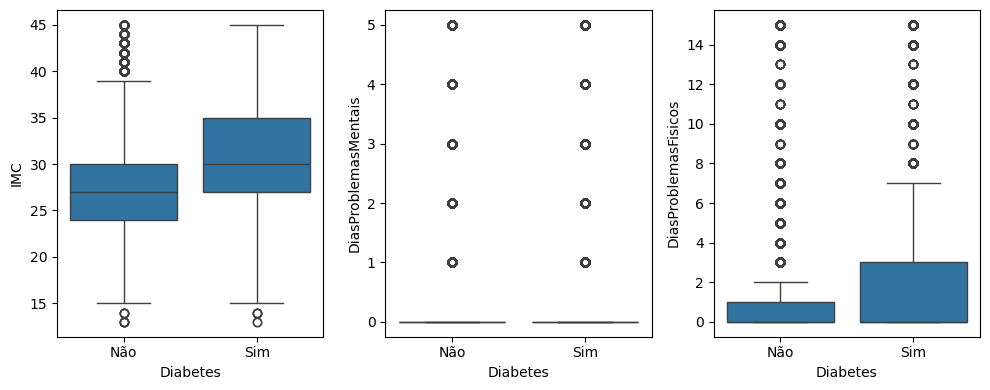

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

for ax, coluna in zip(axs, colunas_numericas):
    sns.boxplot(data=df_diabetes_sem_outliers, x=coluna_alvo, y=coluna, ax=ax)

plt.tight_layout()
plt.show()


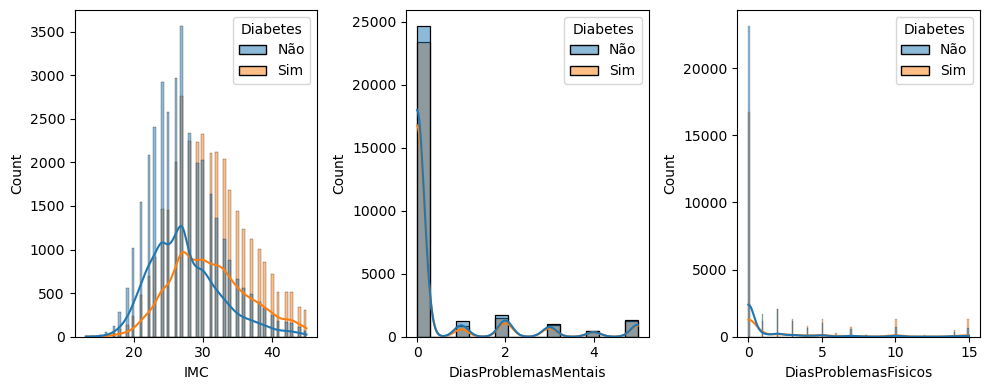

In [68]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

for ax, coluna in zip(axs, colunas_numericas):
    sns.histplot(data=df_diabetes_sem_outliers, x=coluna, hue=coluna_alvo, kde=True, ax=ax)

plt.tight_layout()
plt.show()

In [69]:
df_diabetes_sem_outliers.groupby(coluna_alvo, observed=False).skew(numeric_only=True)

,IMC,DiasProblemasMentais,DiasProblemasFisicos
Diabetes,,,
Não,0.714415,2.454599,2.874805
Sim,0.323244,2.507093,1.856026


In [70]:
df_diabetes_sem_outliers.groupby(coluna_alvo, observed=False)[colunas_numericas].apply(pd.DataFrame.kurtosis)

,IMC,DiasProblemasMentais,DiasProblemasFisicos
Diabetes,,,
Não,0.481335,5.003764,8.079214
Sim,-0.343434,5.185706,2.367289


In [71]:
dados_imc_sim_sem_outliers = df_diabetes_sem_outliers.query("Diabetes == 'Sim'")["IMC"].values
dados_imc_nao_sem_outliers = df_diabetes_sem_outliers.query("Diabetes == 'Não'")["IMC"].values

dataframe_imc_sem_outliers = pd.DataFrame({"Sim": dados_imc_sim_sem_outliers, "Não": dados_imc_nao_sem_outliers})
dataframe_imc_sem_outliers

,Sim,Não
0,30.0,26.0
1,25.0,26.0
2,28.0,26.0
3,23.0,28.0
4,27.0,29.0
...,...,...
35341,37.0,23.0
35342,29.0,29.0
35343,25.0,24.0
35344,18.0,NaN


In [72]:
dados_imc_nao_sem_outliers.mean()

nan

In [73]:
dataframe_imc_sem_outliers["Não"].mean()

27.39410195358444

In [74]:
print(
    kstest(
        dataframe_imc_sem_outliers["Não"],
        norm.cdf,
        args=(dataframe_imc_sem_outliers["Não"].mean(),
              dataframe_imc_sem_outliers["Não"].std()),
        nan_policy="omit")
)

print(
    kstest(
        dataframe_imc_sem_outliers["Sim"],
        norm.cdf,
        args=(dataframe_imc_sem_outliers["Sim"].mean(),
              dataframe_imc_sem_outliers["Sim"].std()),
        nan_policy="omit")
)

KstestResult(statistic=0.10815079726309146, pvalue=0.0, statistic_location=27.0, statistic_sign=1)
KstestResult(statistic=0.07345716240963396, pvalue=2.3370072025339465e-158, statistic_location=30.0, statistic_sign=1)


In [75]:
analise_levene(dataframe_imc_sem_outliers, centro='median')

Teste de Levene
estatistica_levene=532.986
Ao menos uma variância é diferente (valor p: 0.000)


In [76]:
analise_ttest_ind(dataframe_imc_sem_outliers, variancias_iguais=False)

Teste t de Student(independente)
estatistica_ttest=85.248
Rejeita a hipótese nula (valor p: 0.000)


In [77]:
analise_mannwhitneyu(dataframe_imc_sem_outliers)

Teste de Mann-Whitney
estatistica_mw=801702843.000
Rejeita a hipótese nula (valor p: 0.000)


### Variáveis categóricas

## variavel binaria

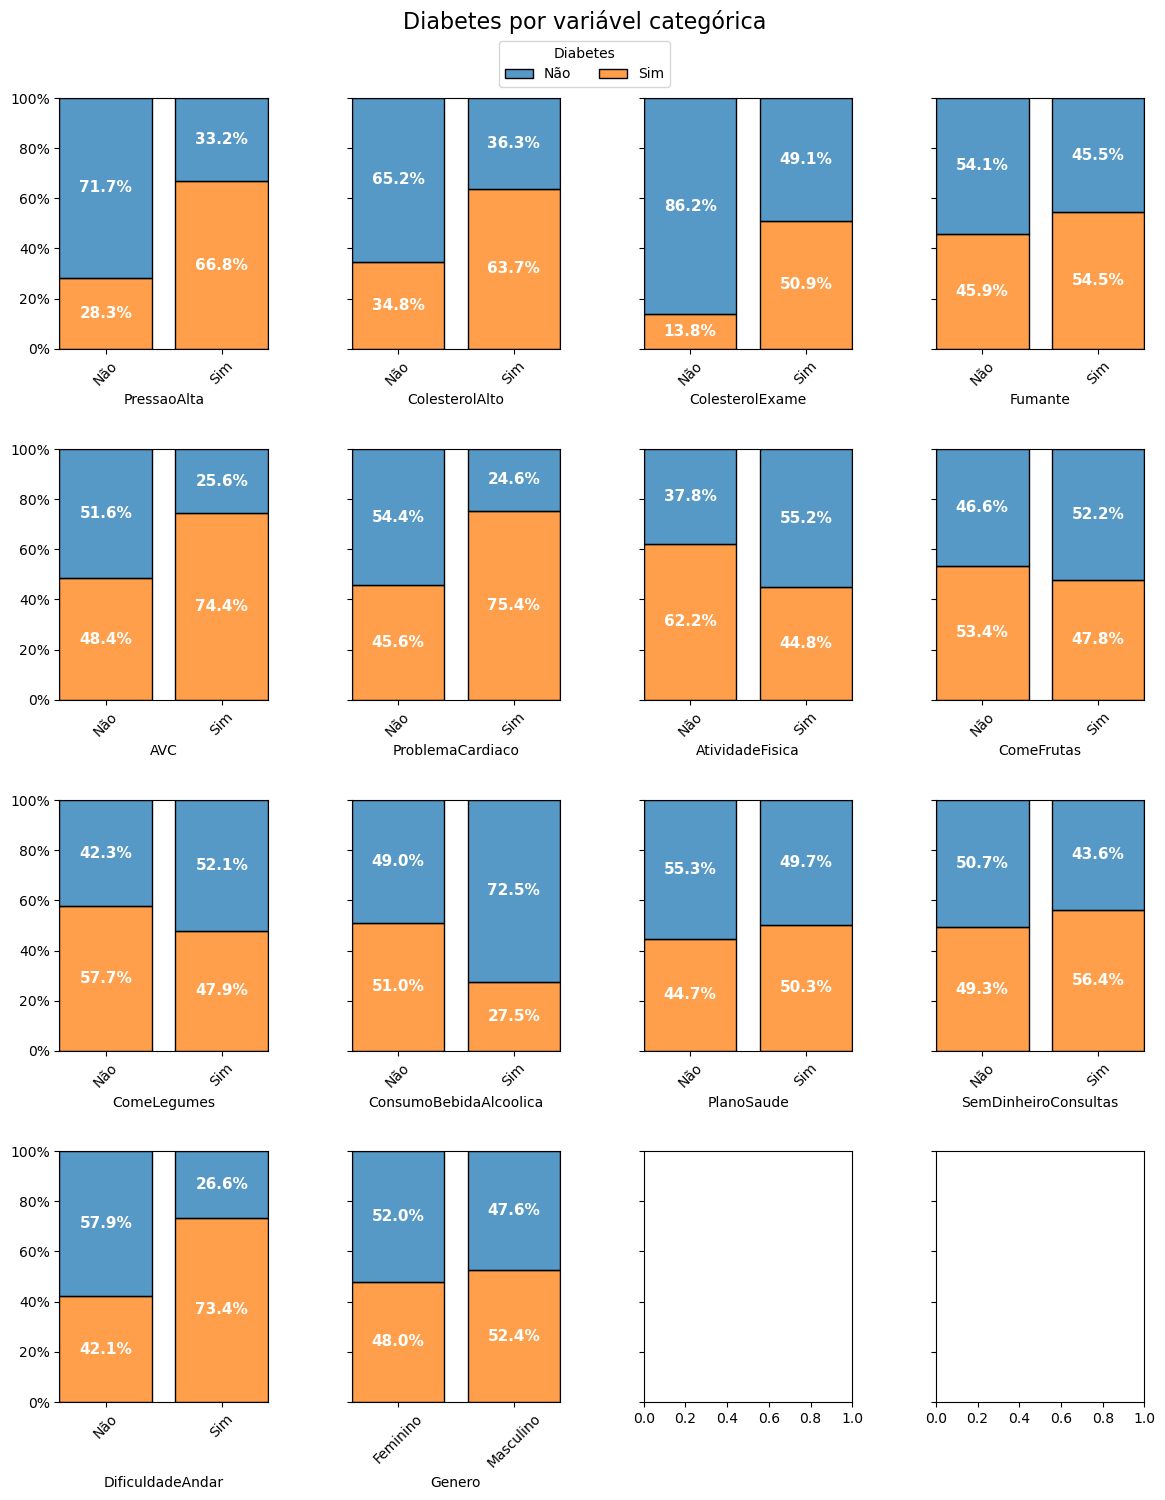

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14, 16), sharey=True)

for i, coluna in enumerate(colunas_binarias):
    h = sns.histplot(x=coluna,
                     hue=coluna_alvo,
                     data=df_diabetes_tratado,
                     multiple='fill',
                     ax=axs.flat[i],
                     stat='percent',
                     shrink=0.8
                     )

    h.tick_params(axis='x', labelrotation=45)
    h.grid(False)

    h.yaxis.set_major_formatter(PercentFormatter(1))
    h.set_ylabel('')

    for bar in h.containers:
        h.bar_label(bar, label_type='center', labels=[f'{b.get_height():.1%}' for b in bar], color='white', weight='bold', fontsize=11)

    legend = h.get_legend()
    legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=2, title='Diabetes', bbox_to_anchor=(0.5, 0.965))
fig.suptitle('Diabetes por variável categórica', fontsize=16)

fig.align_labels()

plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.925)

plt.show()

## variavel não binario

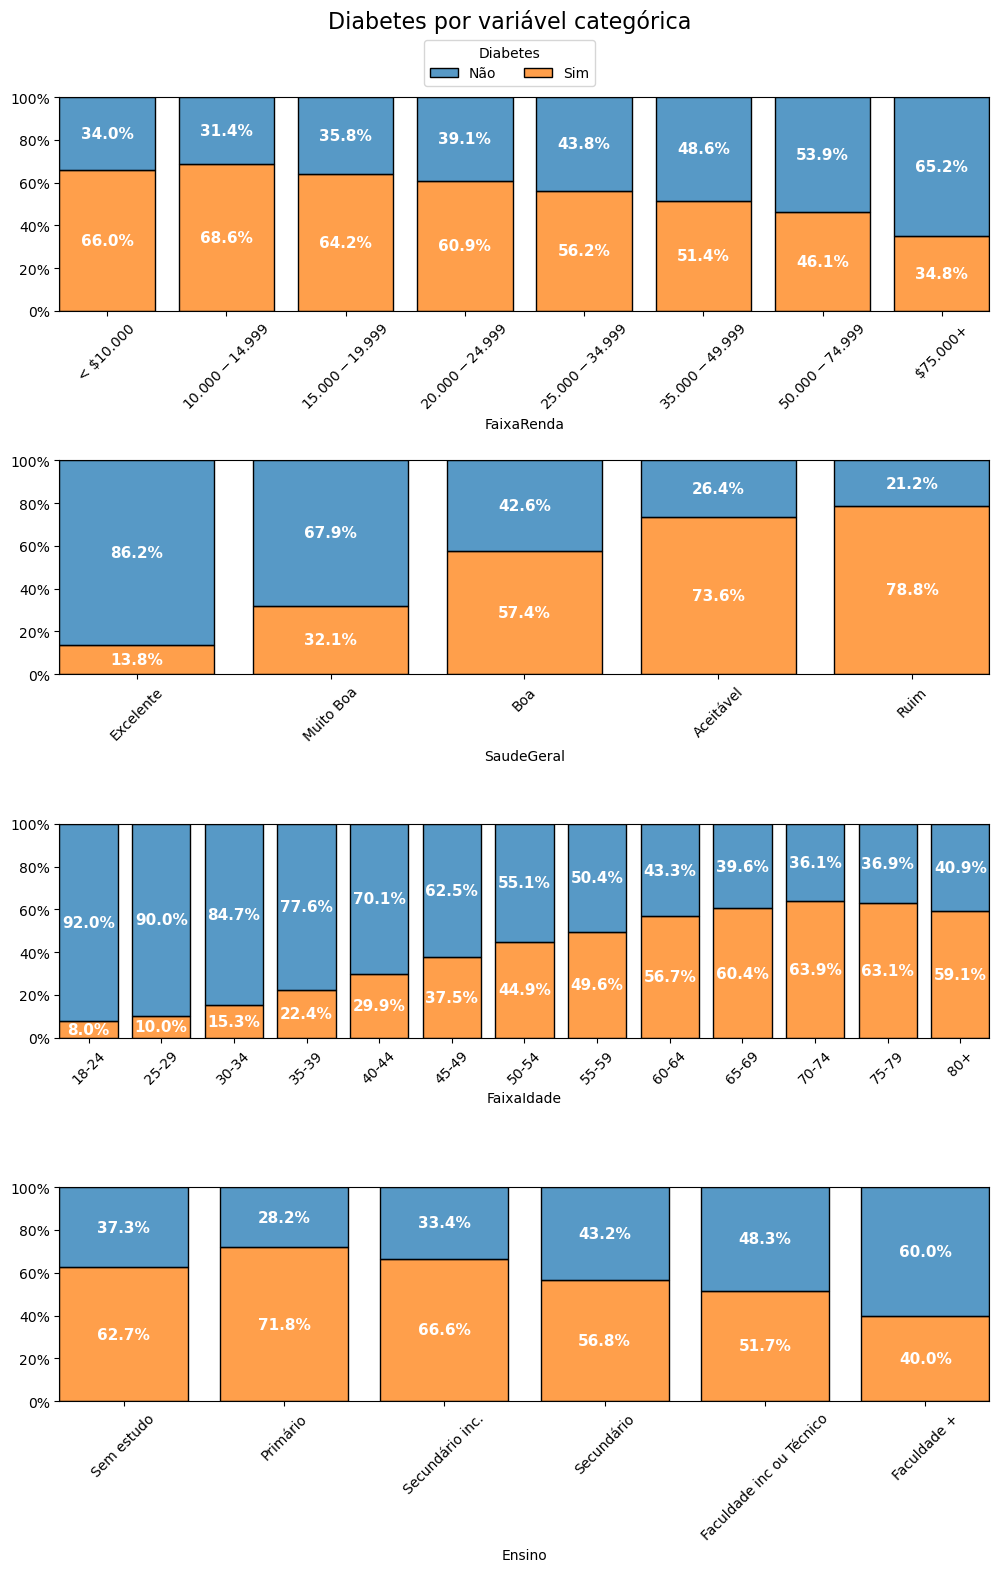

In [82]:
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12, 16))

for i, coluna in enumerate(colunas_nao_binarias):
    h = sns.histplot(x=coluna,
                     hue=coluna_alvo,
                     data=df_diabetes_tratado,
                     multiple='fill',
                     ax=axs.flat[i],
                     stat='percent',
                     shrink=0.8
                     )

    h.tick_params(axis='x', labelrotation=45)
    h.grid(False)

    h.yaxis.set_major_formatter(PercentFormatter(1))
    h.set_ylabel('')

    for bar in h.containers:
        h.bar_label(bar, label_type='center', labels=[f'{b.get_height():.1%}' for b in bar], color='white', weight='bold', fontsize=11)

    legend = h.get_legend()
    legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=2, title='Diabetes', bbox_to_anchor=(0.5, 0.965))
fig.suptitle('Diabetes por variável categórica', fontsize=16)

fig.align_labels()

plt.subplots_adjust(wspace=0.1, hspace=0.7, top=0.925)

plt.show()

## Estudo extra! explorar além da coluna alvo

ideia e explorar outras colunas e ver outras analises

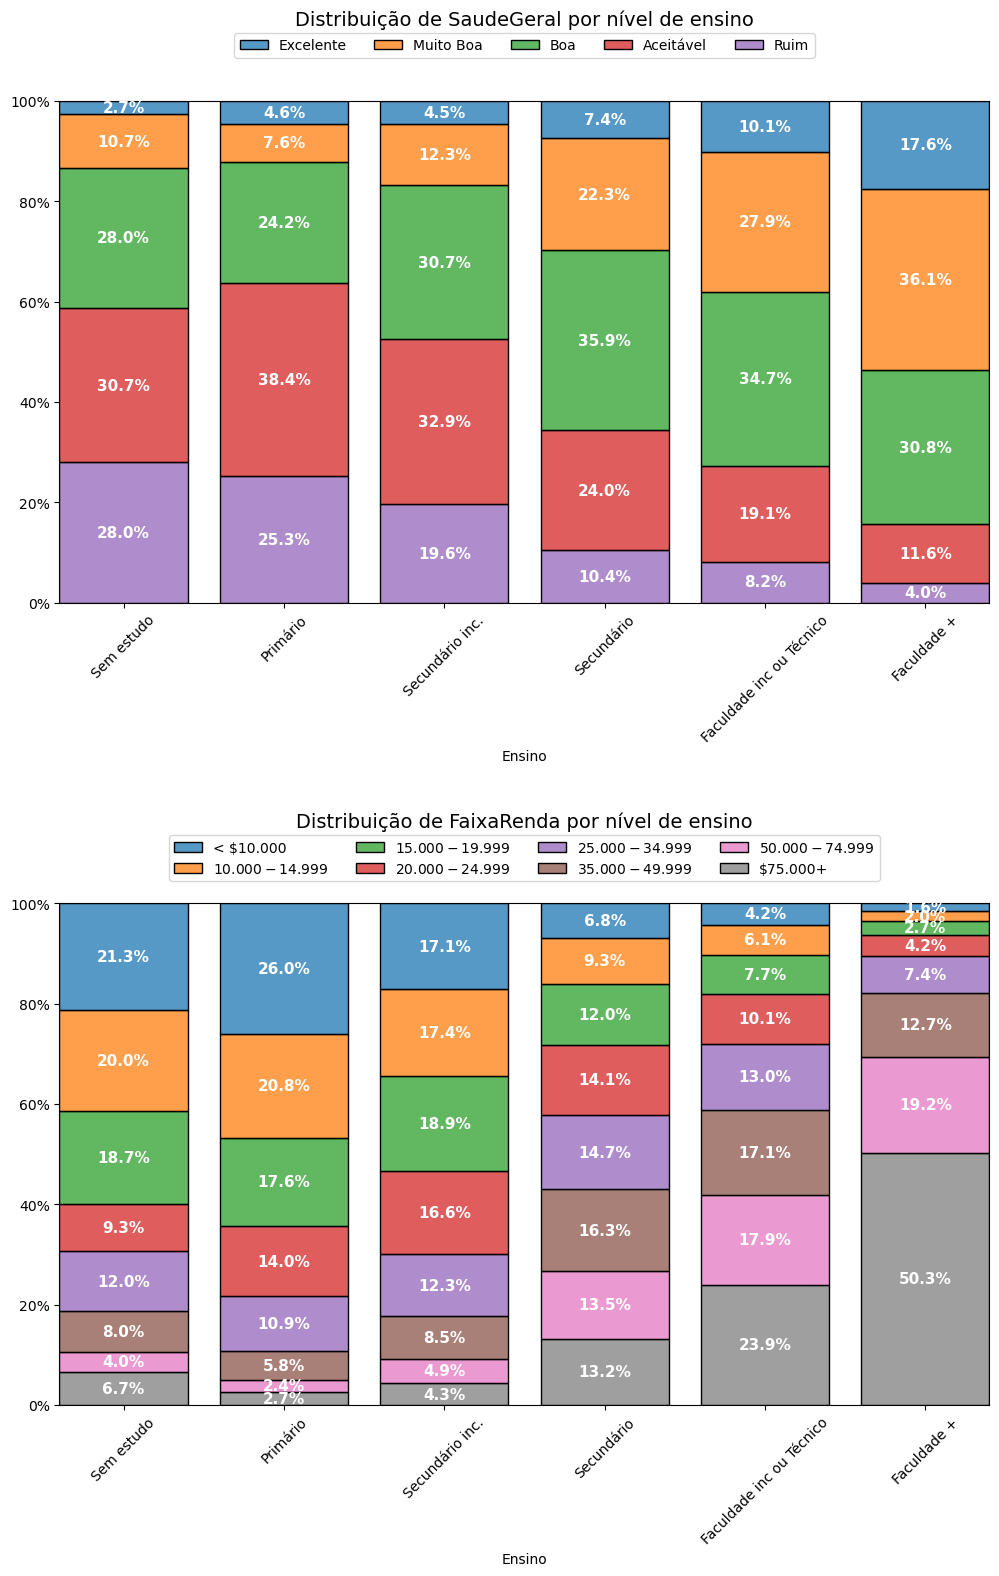

In [85]:
from matplotlib.ticker import PercentFormatter

colunas_analise = ["SaudeGeral", "FaixaRenda"]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

for ax, coluna in zip(axs.flatten(), colunas_analise):
    h = sns.histplot(x='Ensino',
                     hue=coluna,
                     data=df_diabetes_tratado,
                     multiple='fill',
                     ax=ax,
                     stat='percent',
                     shrink=0.8
                     )

    h.tick_params(axis='x', labelrotation=45)
    h.grid(False)

    h.yaxis.set_major_formatter(PercentFormatter(1))
    h.set_ylabel('')

    for bar in h.containers:
        h.bar_label(bar, label_type='center', labels=[f'{b.get_height():.1%}' for b in bar], color='white', weight='bold', fontsize=11)

    legend = h.get_legend()
    legend.remove()

    labels = [text.get_text() for text in legend.get_texts()]

    numero_itens = len(df_diabetes_tratado[coluna].cat.categories)

    ax.legend(
        handles=legend.legend_handles,
        labels=labels,
        loc='upper center',
        ncols=numero_itens if numero_itens <= 6 else min(4, numero_itens),
        bbox_to_anchor=(0.5, 1.15)
        )

    ax.set_title(f'Distribuição de {coluna} por nível de ensino', fontsize=14, pad=55)

# fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=2, title='Diabetes', bbox_to_anchor=(0.5, 0.965))
# fig.suptitle('Diabetes por variável categórica', fontsize=16)
# fig.align_labels()

plt.subplots_adjust(wspace=0.1, hspace=0.6, top=0.925)

plt.show()

## analise estatistica

In [87]:
tabelas_contingencia = {}

for coluna in df_diabetes_tratado.select_dtypes('category').columns:
    if coluna != coluna_alvo:
        tabelas_contingencia[coluna] = pd.crosstab(df_diabetes_tratado[coluna], df_diabetes_tratado[coluna_alvo])

tabelas_contingencia['PressaoAlta']

Diabetes,Não,Sim
PressaoAlta,,
Não,22118,8742
Sim,13228,26604


In [88]:
for coluna in df_diabetes_tratado.select_dtypes('category').columns:
    if coluna != coluna_alvo:
        display(
            pd.crosstab(
                df_diabetes_tratado[coluna_alvo],
                df_diabetes_tratado[coluna],
                margins=True,
                normalize='index',
                ).style.format('{:.2%}'))

PressaoAlta,Não,Sim
Diabetes,,
Não,62.58%,37.42%
Sim,24.73%,75.27%
All,43.65%,56.35%


ColesterolAlto,Não,Sim
Diabetes,,
Não,61.87%,38.13%
Sim,32.99%,67.01%
All,47.43%,52.57%


ColesterolExame,Não,Sim
Diabetes,,
Não,4.27%,95.73%
Sim,0.68%,99.32%
All,2.47%,97.53%


Fumante,Não,Sim
Diabetes,,
Não,56.77%,43.23%
Sim,48.18%,51.82%
All,52.47%,47.53%


AVC,Não,Sim
Diabetes,,
Não,96.81%,3.19%
Sim,90.75%,9.25%
All,93.78%,6.22%


ProblemaCardiaco,Não,Sim
Diabetes,,
Não,92.73%,7.27%
Sim,77.71%,22.29%
All,85.22%,14.78%


AtividadeFisica,Não,Sim
Diabetes,,
Não,22.45%,77.55%
Sim,36.95%,63.05%
All,29.70%,70.30%


ComeFrutas,Não,Sim
Diabetes,,
Não,36.19%,63.81%
Sim,41.46%,58.54%
All,38.82%,61.18%


ComeLegumes,Não,Sim
Diabetes,,
Não,17.89%,82.11%
Sim,24.36%,75.64%
All,21.12%,78.88%


ConsumoBebidaAlcoolica,Não,Sim
Diabetes,,
Não,93.81%,6.19%
Sim,97.65%,2.35%
All,95.73%,4.27%


PlanoSaude,Não,Sim
Diabetes,,
Não,4.99%,95.01%
Sim,4.02%,95.98%
All,4.50%,95.50%


SemDinheiroConsultas,Não,Sim
Diabetes,,
Não,91.80%,8.20%
Sim,89.41%,10.59%
All,90.61%,9.39%


SaudeGeral,Excelente,Muito Boa,Boa,Aceitável,Ruim
Diabetes,,,,,
Não,20.21%,38.17%,28.21%,9.94%,3.48%
Sim,3.23%,18.05%,38.07%,27.70%,12.95%
All,11.72%,28.11%,33.14%,18.82%,8.22%


DificuldadeAndar,Não,Sim
Diabetes,,
Não,86.58%,13.42%
Sim,62.88%,37.12%
All,74.73%,25.27%


Genero,Feminino,Masculino
Diabetes,,
Não,56.51%,43.49%
Sim,52.09%,47.91%
All,54.30%,45.70%


FaixaIdade,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+
Diabetes,,,,,,,,,,,,,
Não,2.55%,3.55%,4.91%,6.13%,6.99%,8.22%,10.71%,12.28%,12.39%,12.16%,8.21%,5.63%,6.27%
Sim,0.22%,0.40%,0.89%,1.77%,2.97%,4.93%,8.74%,12.06%,16.22%,18.55%,14.54%,9.63%,9.08%
All,1.38%,1.97%,2.90%,3.95%,4.98%,6.58%,9.72%,12.17%,14.30%,15.36%,11.38%,7.63%,7.68%


Ensino,Sem estudo,Primário,Secundário inc.,Secundário,Faculdade inc ou Técnico,Faculdade +
Diabetes,,,,,,
Não,0.08%,1.31%,3.26%,23.78%,27.38%,44.19%
Sim,0.13%,3.35%,6.50%,31.31%,29.29%,29.42%
All,0.11%,2.33%,4.88%,27.55%,28.33%,36.81%


FaixaRenda,< $10.000,$10.000-$14.999,$15.000-$19.999,$20.000-$24.999,$25.000-$34.999,$35.000-$49.999,$50.000-$74.999,$75.000+
Diabetes,,,,,,,,
Não,3.47%,3.99%,5.63%,7.37%,9.92%,14.13%,17.43%,38.06%
Sim,6.74%,8.73%,10.09%,11.47%,12.74%,14.97%,14.90%,20.36%
All,5.11%,6.36%,7.86%,9.42%,11.33%,14.55%,16.16%,29.21%


In [89]:
from scipy.stats import chi2_contingency

for coluna, tabela in tabelas_contingencia.items():
  chi2, valor_p, _, _ = chi2_contingency(tabela)
  print(f"Coluna: {coluna}\n{chi2=}\nValor p: {valor_p}\n")

Coluna: PressaoAlta
chi2=10287.972984997781
Valor p: 0.0

Coluna: ColesterolAlto
chi2=5911.8066998822505
Valor p: 0.0

Coluna: ColesterolExame
chi2=939.6317718798654
Valor p: 2.3798712773418195e-206

Coluna: Fumante
chi2=522.4810772937883
Valor p: 1.2211053080400827e-115

Coluna: AVC
chi2=1111.0793074560897
Valor p: 1.290837098922016e-243

Coluna: ProblemaCardiaco
chi2=3161.7202445322782
Valor p: 0.0

Coluna: AtividadeFisica
chi2=1778.9607035956992
Valor p: 0.0

Coluna: ComeFrutas
chi2=206.50090830615105
Valor p: 7.967064756507964e-47

Coluna: ComeLegumes
chi2=444.0806516898606
Valor p: 1.4007103685991128e-98

Coluna: ConsumoBebidaAlcoolica
chi2=635.0865339749427
Valor p: 3.9133962745676324e-140

Coluna: PlanoSaude
chi2=37.79561046998934
Valor p: 7.855833890083924e-10

Coluna: SemDinheiroConsultas
chi2=118.4167174482265
Valor p: 1.4053255735064045e-27

Coluna: SaudeGeral
chi2=12304.31897990353
Valor p: 0.0

Coluna: DificuldadeAndar
chi2=5253.694843161374
Valor p: 0.0

Coluna: Genero
ch

### teste: Coeficiente de Spearman

Estatística descritiva bivariada
<br>
Coeficiente de Spearman: https://colab.research.google.com/drive/1XXH68-kQhxDdxi5r6HGYE3c55H6VVQWz#scrollTo=2qTb8TwPyEgl

![anatomia]()
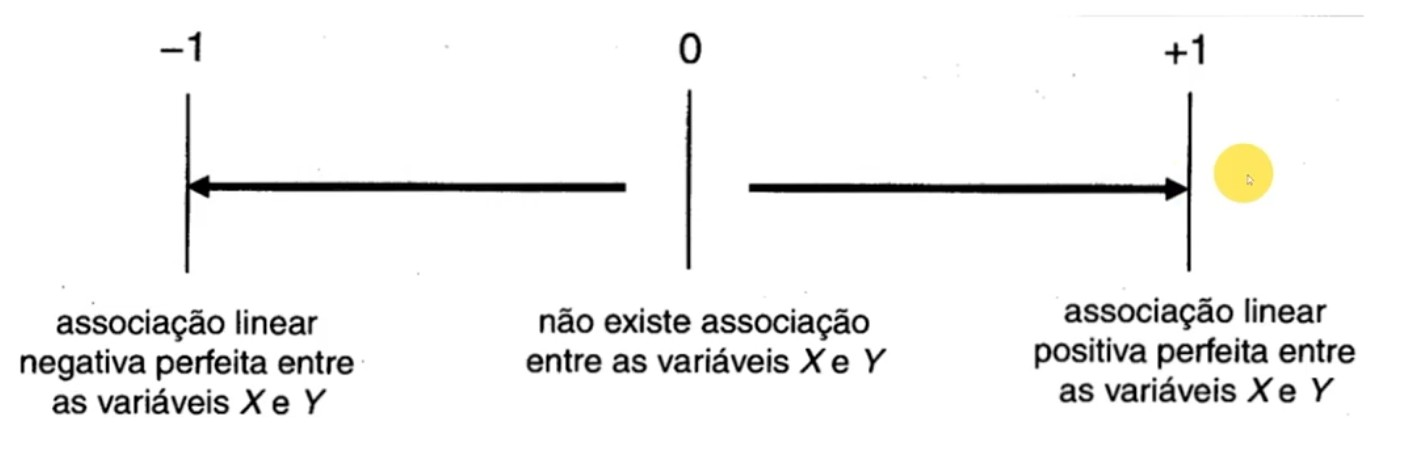

In [92]:
resultado_correlacao = df_diabetes_tratado.select_dtypes('category').apply(lambda coluna: coluna.cat.codes).corr(method='spearman', numeric_only=False)

resultado_correlacao

,Diabetes,PressaoAlta,ColesterolAlto,ColesterolExame,Fumante,AVC,ProblemaCardiaco,AtividadeFisica,ComeFrutas,ComeLegumes,ConsumoBebidaAlcoolica,PlanoSaude,SemDinheiroConsultas,SaudeGeral,DificuldadeAndar,Genero,FaixaIdade,Ensino,FaixaRenda
Diabetes,1.000000,0.381516,0.289213,0.115382,0.085999,0.125427,0.211523,-0.158666,-0.054077,-0.079293,-0.094853,0.023191,0.040977,0.414259,0.272646,0.044413,0.261620,-0.169926,-0.232529
PressaoAlta,0.381516,1.000000,0.316515,0.103283,0.087438,0.129060,0.210750,-0.136102,-0.040852,-0.066624,-0.027030,0.035764,0.026517,0.324038,0.234784,0.040819,0.322180,-0.143543,-0.196896
ColesterolAlto,0.289213,0.316515,1.000000,0.085981,0.093398,0.099786,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.031532,0.033199,0.239138,0.162043,0.017324,0.217974,-0.083177,-0.110289
ColesterolExame,0.115382,0.103283,0.085981,1.000000,-0.004331,0.022529,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.106800,-0.062669,0.060257,0.044430,-0.007991,0.099208,-0.007693,0.007271
Fumante,0.085999,0.087438,0.093398,-0.004331,1.000000,0.064658,0.124418,-0.079823,-0.074811,-0.029926,0.077835,-0.012939,0.035799,0.149960,0.119789,0.112125,0.098822,-0.152918,-0.112241
AVC,0.125427,0.129060,0.099786,0.022529,0.064658,1.000000,0.223394,-0.079985,-0.008996,-0.047601,-0.023395,0.006484,0.036198,0.182517,0.192266,0.003822,0.123544,-0.071889,-0.134487
ProblemaCardiaco,0.211523,0.210750,0.181187,0.043497,0.124418,0.223394,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.015687,0.036029,0.268815,0.232611,0.098161,0.225231,-0.093727,-0.148924
AtividadeFisica,-0.158666,-0.136102,-0.090453,-0.008249,-0.079823,-0.079985,-0.098223,1.000000,0.133813,0.149322,0.019111,0.027089,-0.063302,-0.270967,-0.276868,0.051753,-0.092685,0.193831,0.202370
ComeFrutas,-0.054077,-0.040852,-0.047384,0.017384,-0.074811,-0.008996,-0.019436,0.133813,1.000000,0.238605,-0.033246,0.029385,-0.045843,-0.099559,-0.050784,-0.088723,0.067778,0.104653,0.076732
ComeLegumes,-0.079293,-0.066624,-0.042836,0.000349,-0.029926,-0.047601,-0.036315,0.149322,0.238605,1.000000,0.022090,0.029152,-0.037146,-0.117258,-0.084072,-0.052604,-0.017208,0.153539,0.155816


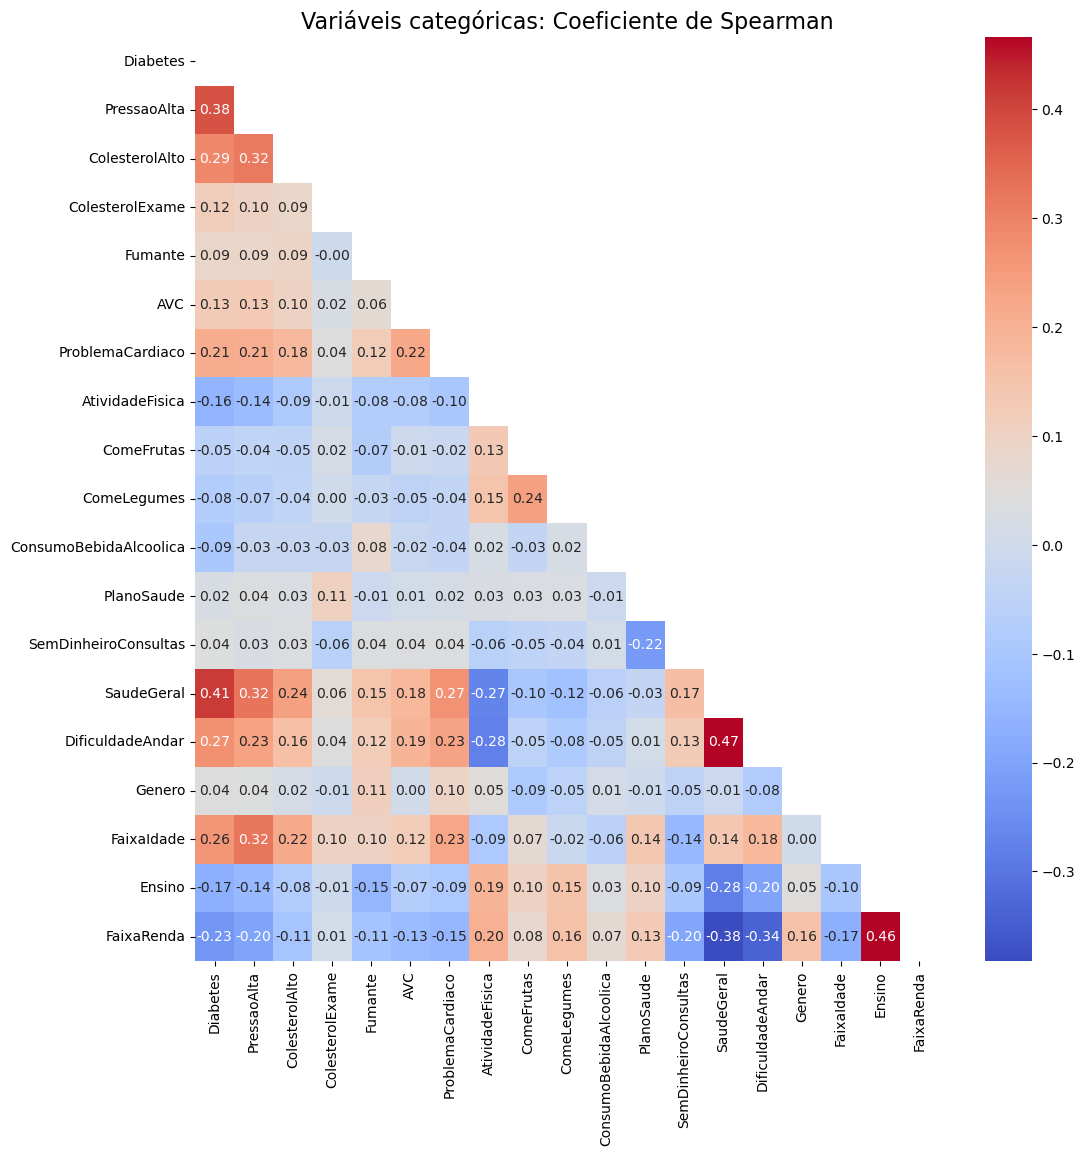

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

matriz = np.triu(resultado_correlacao)

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(resultado_correlacao, cmap='coolwarm', mask=matriz, annot=True, fmt='.2f', ax=ax)

plt.title('Variáveis categóricas: Coeficiente de Spearman', fontsize=16)

plt.show()